In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Dependency imports
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
'''
sns.set_style({'axes.facecolor':'#E7E7F0', 'figure.facecolor':'white', \
               'axes.edgecolor': 'white', 'grid.color': 'white', \
              'axes.labelcolor': 'black', 'text.color': 'black', \
              'xtick.color': 'black', 'ytick.color': 'black'})
'''



"\nsns.set_style({'axes.facecolor':'#E7E7F0', 'figure.facecolor':'white',                'axes.edgecolor': 'white', 'grid.color': 'white',               'axes.labelcolor': 'black', 'text.color': 'black',               'xtick.color': 'black', 'ytick.color': 'black'})\n"

In [ ]:
class DataPrep():
  def __init__(self,params):
    self.params=params
    self.data=pd.read_excel(self.params["data_location"])
    self.X_col = self.data.columns[:-1]
  
  def eda(self):


    colunas = self.X_col
    for col in colunas:
      fig, ax = plt.subplots(1,1, figsize=(15, 6))
      sns.regplot(x=col,y=self.params["target_Y"],data=self.data)
    self.data[self.params["target_Y"]+' qcut']=pd.qcut(self.data[self.params["target_Y"]], 4)

    sns.lmplot( x='latitude', y='longitude', data=self.data, fit_reg=False, hue=self.params["target_Y"]+' qcut', legend=True, height=10,aspect=1)
    self.data.drop(columns=[self.params["target_Y"]+' qcut'],inplace=True)

  def test_train_split(self):

    if self.params["test_train_split"]=="Random":
      X_train, X_test, y_train, y_test = train_test_split(self.data[self.X_col], self.data[self.params["target_Y"]], test_size=self.params["test_train_split_size"], random_state=13)
      
      return X_train, X_test, y_train, y_test
    else:

      X_train, X_test, y_train, y_test =  self.data.loc[self.data[self.params["test_train_split"]]<self.params["test_train_split_size"],self.X_col],self.data.loc[self.data[self.params["test_train_split"]]>=self.params["test_train_split_size"],self.X_col],self.data.loc[self.data[self.params["test_train_split"]]<self.params["test_train_split_size"],self.params["target_Y"]],self.data.loc[self.data[self.params["test_train_split"]]>=self.params["test_train_split_size"],self.params["target_Y"]]
      
      return X_train, X_test, y_train, y_test






## Exploratory Data Analysis

In [ ]:
params = {}
params["data_location"] = '/content/DS - Assignment Part 1 data set.xlsx'
params["target_Y"] = 'House price of unit area'
params["test_train_split"] = "Transaction date"
params["test_train_split_size"] = 2013.416667
ds=DataPrep(params)

In [ ]:
ds.eda()

## Test, Train Split based on Time

In [ ]:
X_train, X_test, y_train, y_test=ds.test_train_split()

In [ ]:
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold




## Function to calculate MAPE

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
#model_SVR = svm.SVR()

## Model Development Class Structure

In [ ]:
class ModelPrep():

  def __init__(self,model_param):
    self.model_param=model_param
    #X_train, X_test, y_train, y_test

  def set_regressor(self):
    if self.model_param["Regressor"]=="Linear_Regressor":
      self.model = Lasso()

    elif self.model_param["Regressor"]=="Random_Forest":
      self.model = ensemble.RandomForestRegressor()

    elif self.model_param["Regressor"]=="Gradient_Boosting":
      self.model = ensemble.GradientBoostingRegressor()

    elif self.model_param["Regressor"]=="Support_Vectors":
      self.model = svm.SVR()
    
    else:
      self.model = Lasso()

  def search_pipeline(self):
    if self.model_param["search_mode"]=="GridSearchCV":
      gs=GridSearchCV(estimator=self.model,
                      param_grid=self.model_param["Hyperparameters"],
                      cv=self.model_param["cv"],
                      n_jobs=-1
                      )
      self.fitted_model=gs.fit(self.model_param["X_train"],
                               self.model_param["y_train"])
      
    elif self.model_param["search_mode"]=="RandomizedSearchCV":
      rs=RandomizedSearchCV(estimator=self.model,
                      param_distributions=self.model_param["Hyperparameters"],
                      cv=self.model_param["cv"],
                      n_jobs=-1
                      )
      self.fitted_model=rs.fit(self.model_param["X_train"],
                               self.model_param["y_train"])
      
  def algorithm_pipeline(self):
    self.search_pipeline()


  def mape(self,actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


  def prediction(self):
    self.prediction = self.fitted_model.predict(self.model_param["X_test"])
    print(mape(self.model_param["y_test"], self.prediction))

  
#lm.fit(X_train, y_train)

## Linear Regression

In [ ]:
model_param={}
model_param["Regressor"]="Linear_Regressor"
model_param["Hyperparameters"]={"alpha": np.arange(0.00, 1.0, 0.01)}
model_param["X_train"],model_param["X_test"],model_param["y_train"],model_param["y_test"] = X_train, X_test, y_train, y_test

In [ ]:
model_param["search_mode"]="GridSearchCV"
#model_param["search_mode"]="RandomizedSearchCV"

In [ ]:
model_param["cv"]=5

In [ ]:
model_param["Hyperparameters"]

{'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99])}

In [ ]:
Lasso_Model=ModelPrep(model_param)

In [ ]:
Lasso_Model.set_regressor()

In [ ]:
Lasso_Model.algorithm_pipeline()

In [ ]:
Lasso_Model.fitted_model.best_params_

{'alpha': 0.06}

In [ ]:
#Lasso_Model.fitted_model.predict(Lasso_Model.model_param["X_test"])

In [ ]:
Lasso_Model.prediction()

22.90892324013824


## Random Forest

In [ ]:
model_param_rf={}
model_param_rf["Regressor"]="Random_Forest"
model_param_rf["Hyperparameters"]={
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
model_param_rf["X_train"],model_param_rf["X_test"],model_param_rf["y_train"],model_param_rf["y_test"] = X_train, X_test, y_train, y_test

In [ ]:
model_param_rf["search_mode"]="GridSearchCV"

In [ ]:
model_param_rf["cv"]=5

In [ ]:
Random_Forest_Model=ModelPrep(model_param_rf)

In [ ]:
Random_Forest_Model.set_regressor()

In [ ]:
Lasso_Model.algorithm_pipeline()

In [ ]:
Random_Forest_Model.fitted_model.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
Random_Forest_Model.prediction()

14.824406463831489


## Gradient Boosting 

In [ ]:
model_param_gbm={}
model_param_gbm["Regressor"]="Gradient_Boosting"
model_param_gbm["Hyperparameters"]={
    
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
model_param_gbm["X_train"],model_param_gbm["X_test"],model_param_gbm["y_train"],model_param_gbm["y_test"] = X_train, X_test, y_train, y_test

In [ ]:
model_param_gbm["search_mode"]="GridSearchCV"

In [ ]:
model_param_gbm["cv"]=5

In [ ]:
GBM_Model=ModelPrep(model_param_gbm)

In [ ]:
GBM_Model.set_regressor()

In [ ]:
GBM_Model.algorithm_pipeline()

In [ ]:
GBM_Model.fitted_model.best_params_

{'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
GBM_Model.prediction()

15.266743910107786


## Support Vector Machine 

In [ ]:
model_param_svr={}
model_param_svr["Regressor"]="Support_Vectors"
model_param_svr["Hyperparameters"]={'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
model_param_svr["X_train"],model_param_svr["X_test"],model_param_svr["y_train"],model_param_svr["y_test"] = X_train, X_test, y_train, y_test

In [ ]:
model_param_svr["search_mode"]="GridSearchCV"

In [ ]:
model_param_svr["cv"]=5

In [ ]:
SVR_Model=ModelPrep(model_param_svr)

In [ ]:
SVR_Model.set_regressor()

In [ ]:
SVR_Model.algorithm_pipeline() 

In [ ]:
SVR_Model.fitted_model.best_params_

In [ ]:
SVR_Model.prediction()

## End Of Sheet



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
def construct_model():
 # the list of classifiers to use
 regression_models = [
 LinearRegression(),
 Lasso(),
 ]
linear_model_parameters = {}
lasso_parameters = 
parameters = [
 linear_model_parameters,
 lasso_parameters
 ]
data[‘estimators’] = []
# iterate through each classifier and use GridSearchCV
 for I, regressor in enumerate(regression_models):
   clf = GridSearchCV(regressor, # model
     param_grid = parameters[i], # hyperparameters
     scoring=’neg_mean_absolute_error’, # metric for scoring
     cv=10,
     n_jobs=-1, error_score=’raise’, verbose=3)
   clf.fit(X_train, y_train)
   # add the clf to the estimators list
   data[‘estimators’].append((regressor.__class__.__name__, clf))

## Exploratory Data Analysis

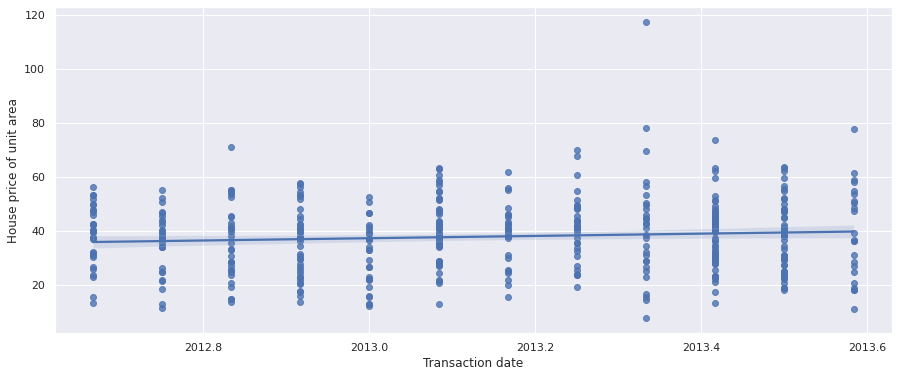

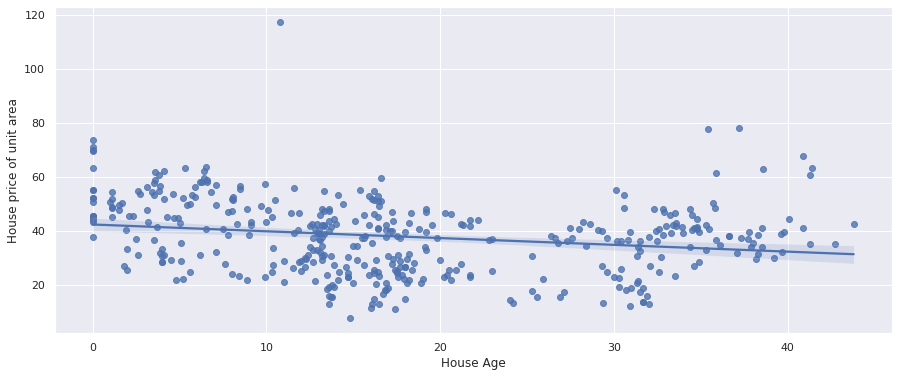

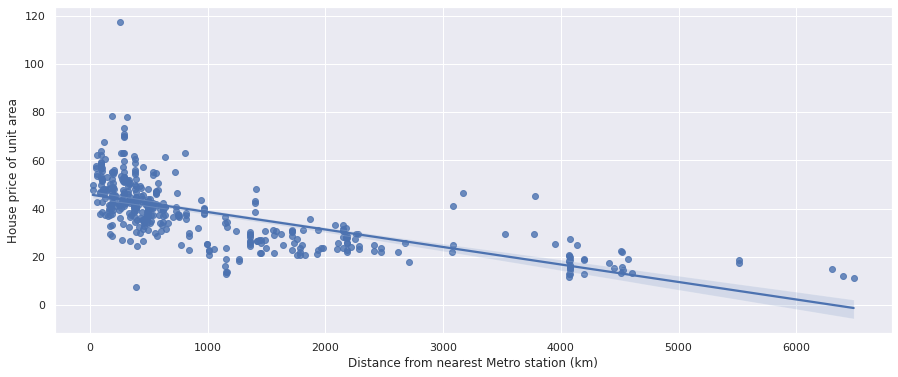

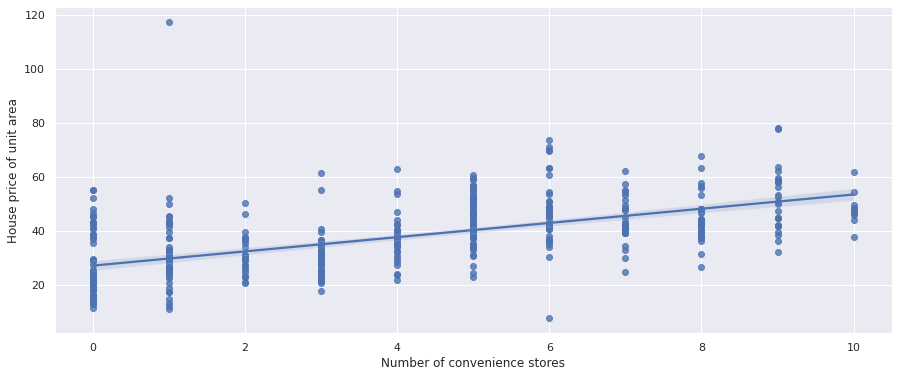

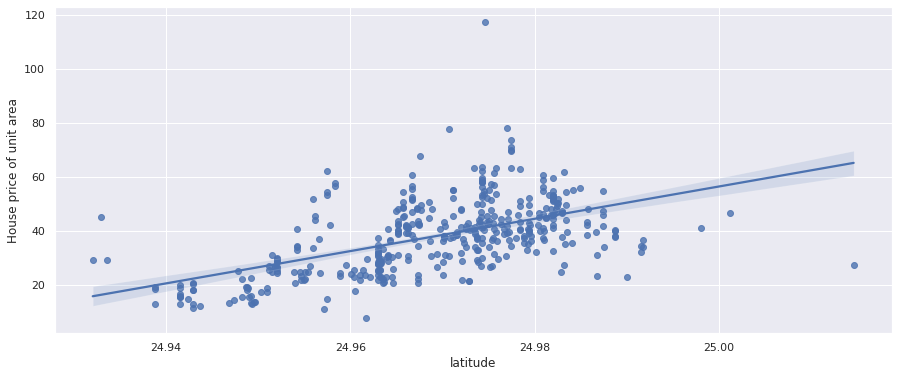

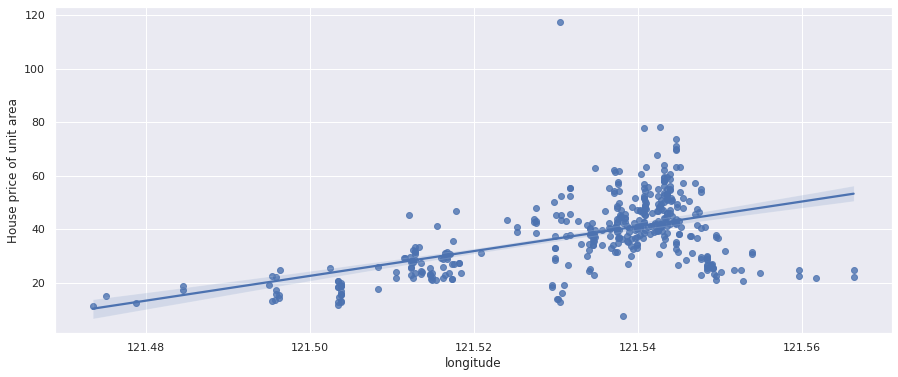

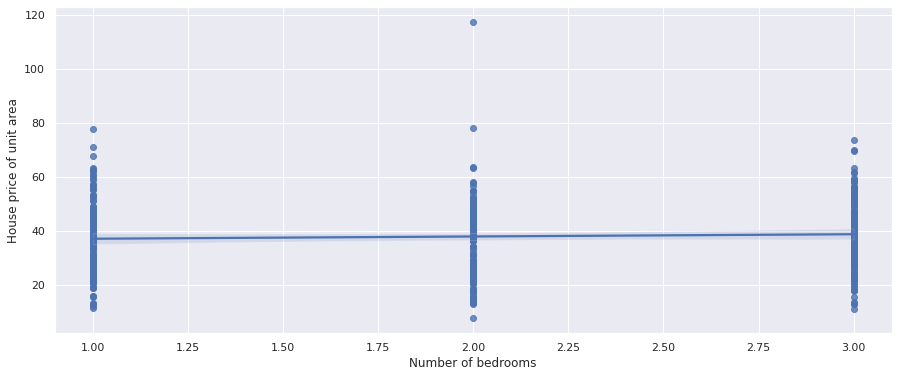

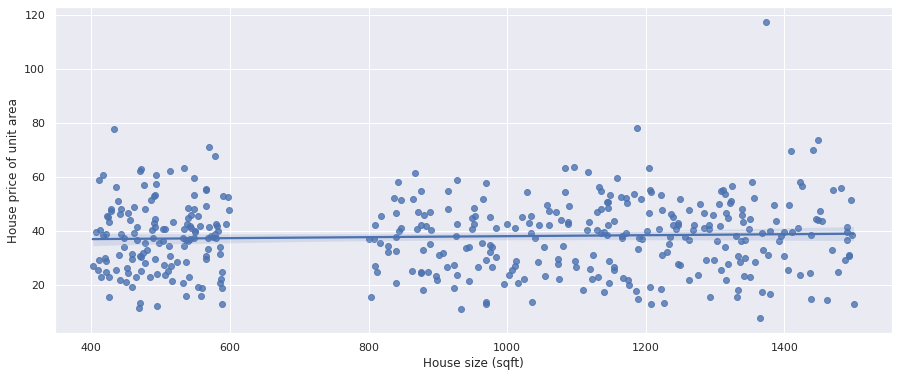

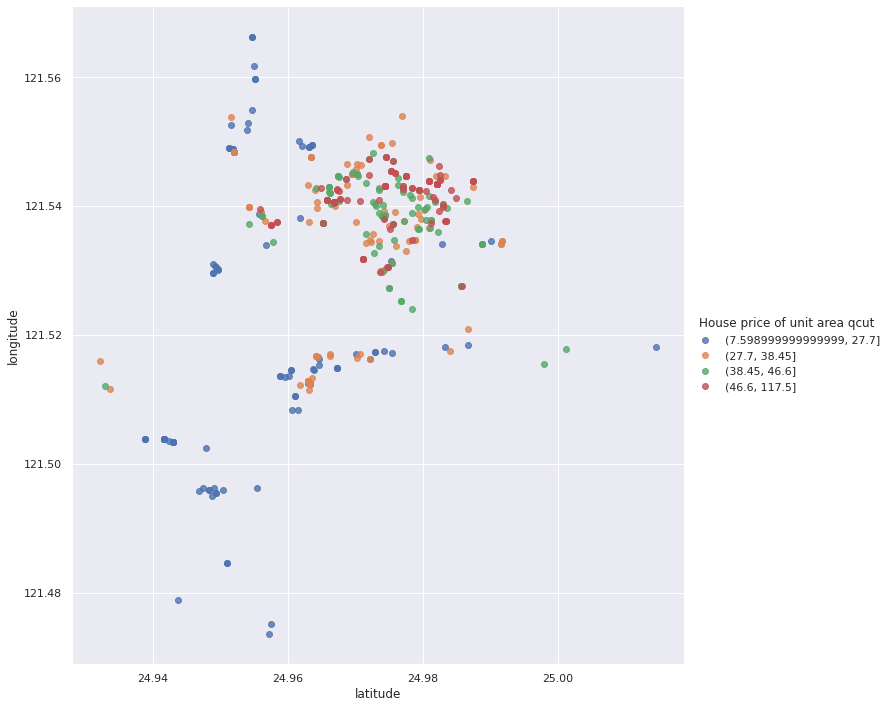

In [ ]:
ds.eda()

## Test, Train Split based on Time 

In [ ]:
X_train, X_test, y_train, y_test=ds.test_train_split()

In [ ]:
data=pd.read_excel('/content/DS - Assignment Part 1 data set.xlsx')

In [ ]:
data.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [ ]:
data.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [ ]:
data['Transaction date'] = data['Transaction date'].astype('datetime64[ns]')
#data['Transaction date']= pd.to_datetime(data['Transaction date'])

In [ ]:
data.head(100)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
95,2012.916667,8.0,104.81010,5,24.96674,121.54067,3,1250,51.8
96,2013.416667,6.4,90.45606,9,24.97433,121.54310,3,1158,59.5
97,2013.083333,28.4,617.44240,3,24.97746,121.53299,3,828,34.6
98,2013.416667,16.4,289.32480,5,24.98203,121.54348,3,1323,51.0


In [ ]:
data['Number of convenience stores'].nunique()

11

In [ ]:
data['Number of convenience stores'].value_counts(dropna=False)

5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: Number of convenience stores, dtype: int64

In [ ]:
data['Number of bedrooms'].value_counts(dropna=False)

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

In [ ]:
(data["House Age"].describe()

count    414.000000
mean      17.712560
std       11.392485
min        0.000000
25%        9.025000
50%       16.100000
75%       28.150000
max       43.800000
Name: House Age, dtype: float64

"\nsns.set_style({'axes.facecolor':'#E7E7F0', 'figure.facecolor':'white',                'axes.edgecolor': 'white', 'grid.color': 'white',               'axes.labelcolor': 'black', 'text.color': 'black',               'xtick.color': 'black', 'ytick.color': 'black'})\n"

In [ ]:
data.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

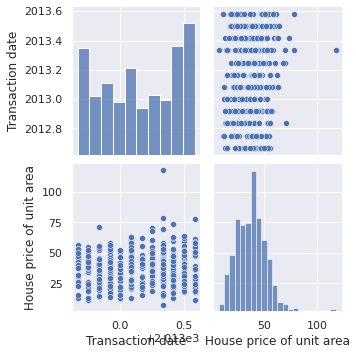

In [ ]:
sns.pairplot(data=data[['Transaction date','House price of unit area']])

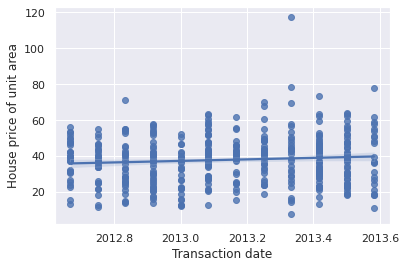

In [ ]:
sns.regplot(x='Transaction date',y='House price of unit area',data=data)

In [ ]:
data.columns[:-1]

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)'],
      dtype='object')

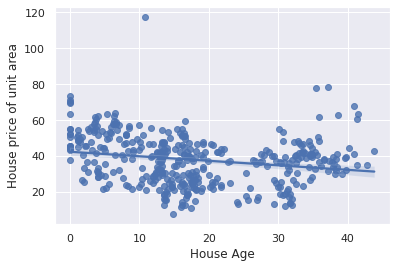

In [ ]:
sns.regplot(x='House Age',y='House price of unit area',data=data)

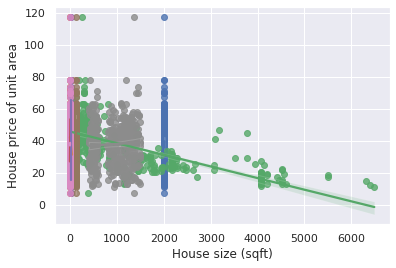

In [ ]:
for col in data.columns[:-1]:
  sns.regplot(x=col,y='House price of unit area',data=data)

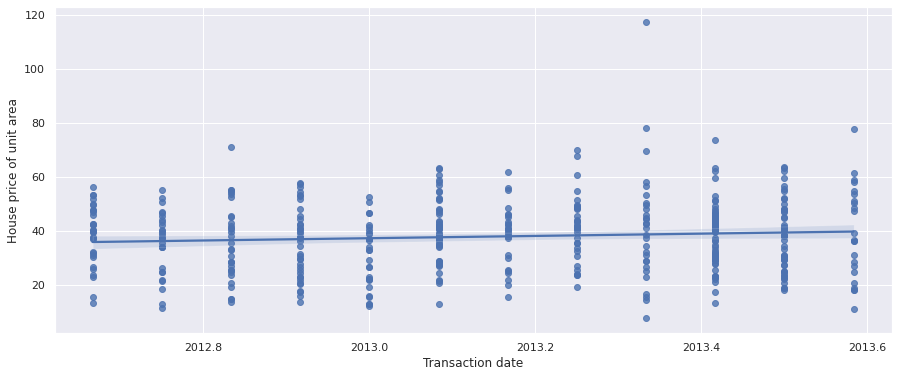

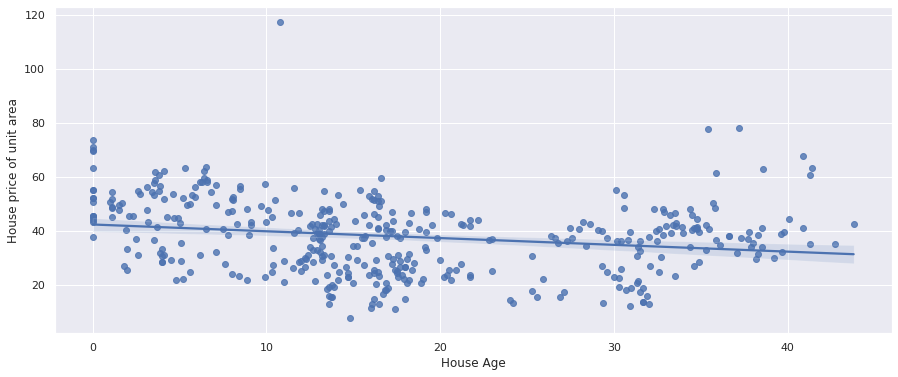

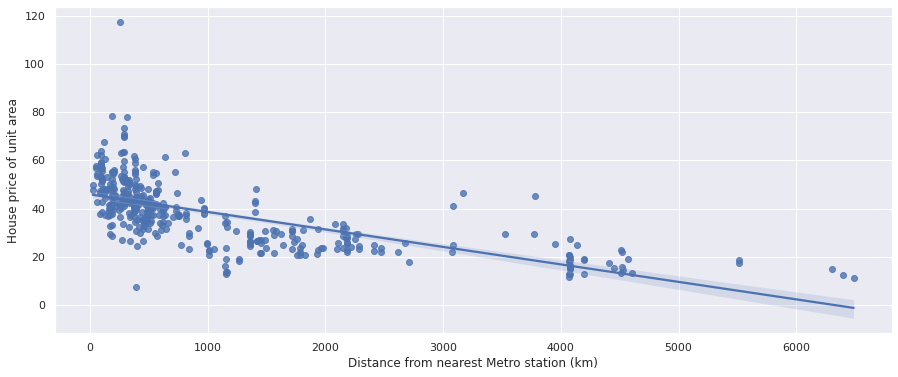

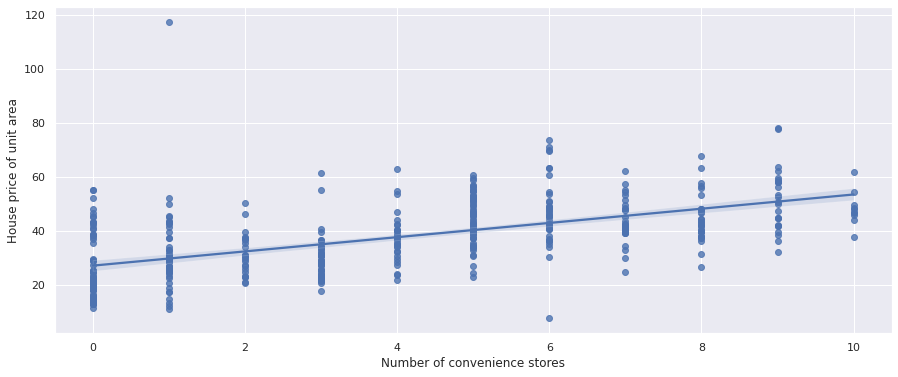

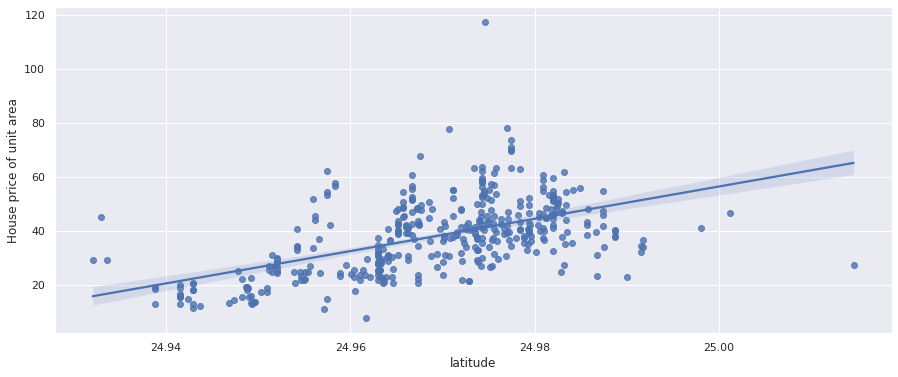

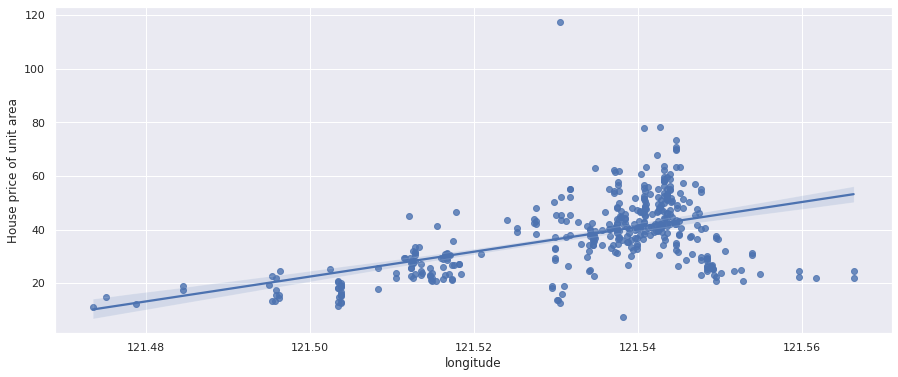

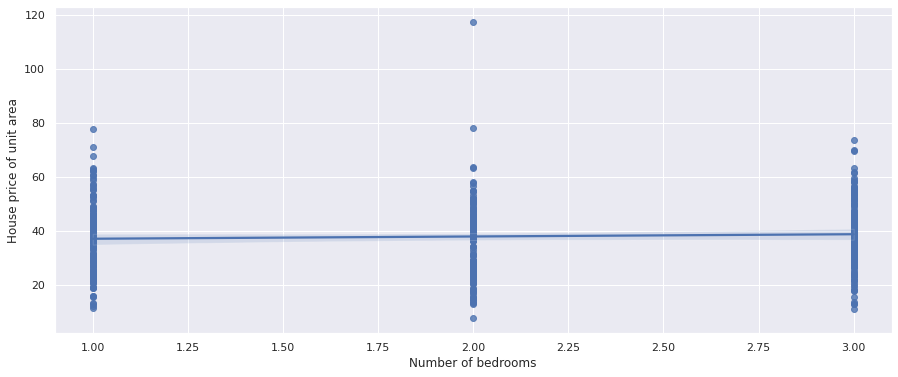

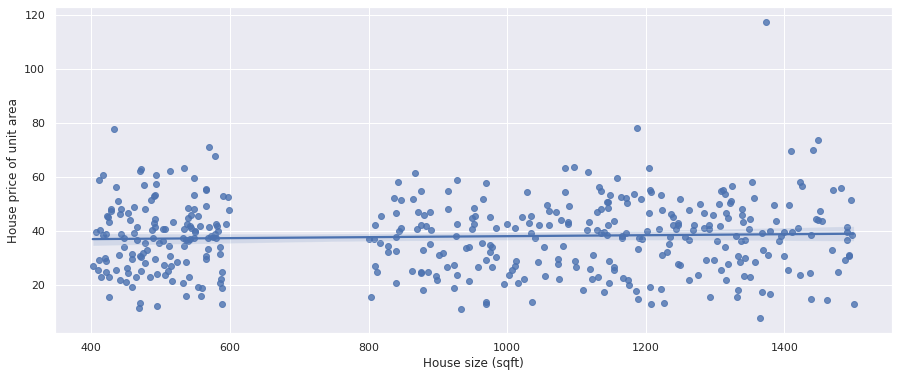

In [ ]:
colunas = data.columns[:-1]
for col in colunas:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.regplot(x=col,y='House price of unit area',data=data)

In [ ]:
data.columns[:-1]

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)'],
      dtype='object')

In [ ]:

data['House price of unit area'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: House price of unit area, dtype: float64

In [ ]:

data['House price of unit area qcut']=pd.qcut(data['House price of unit area'], 4)

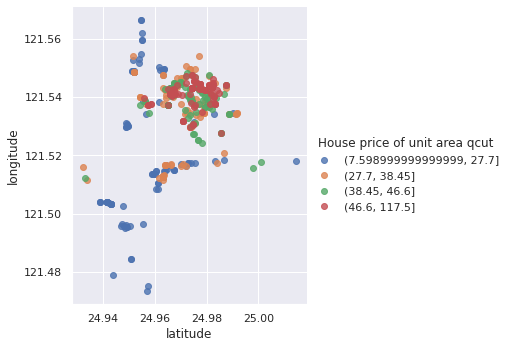

In [ ]:
#fig, ax = plt.subplots(1,1, figsize=(15, 6))
sns.lmplot( x='latitude', y='longitude', data=data, fit_reg=False, hue='House price of unit area qcut', legend=True)
#plt.legend(loc='lower right')#

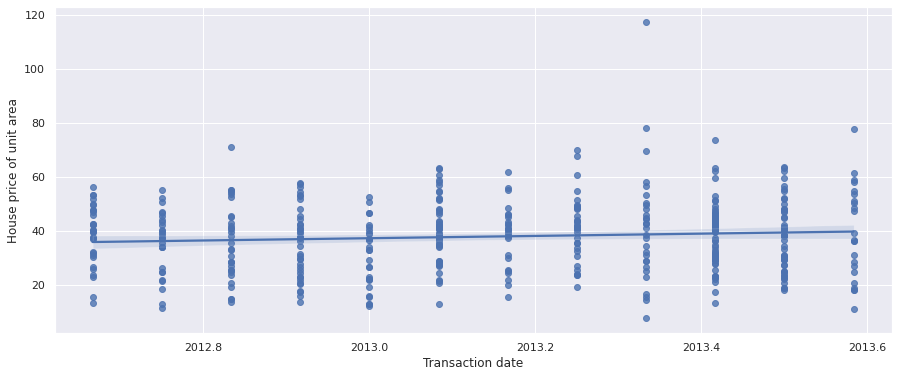

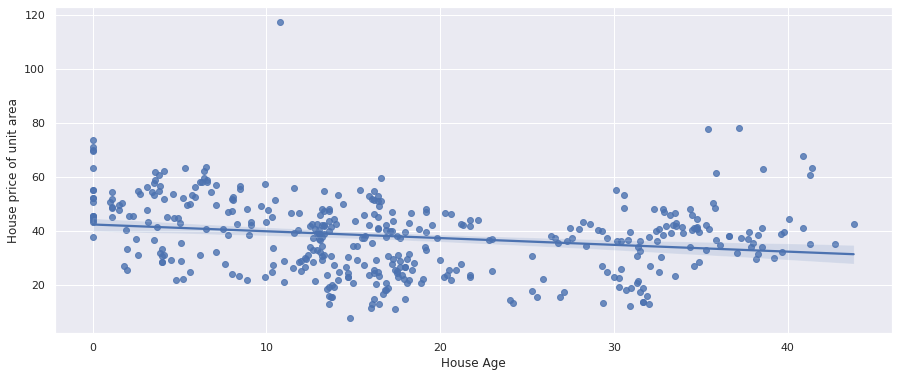

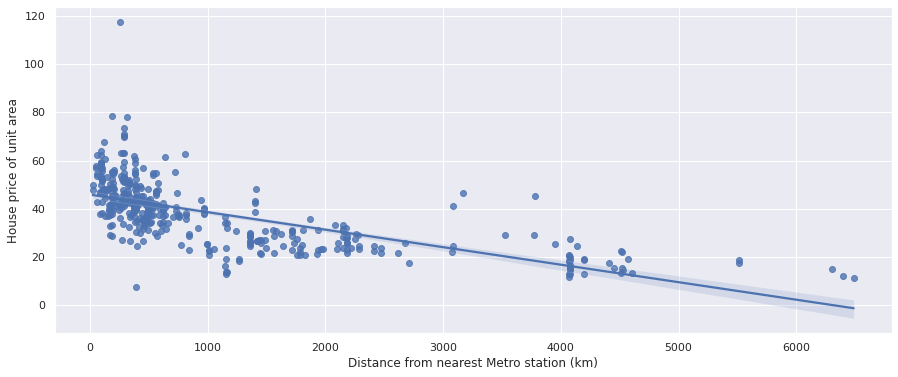

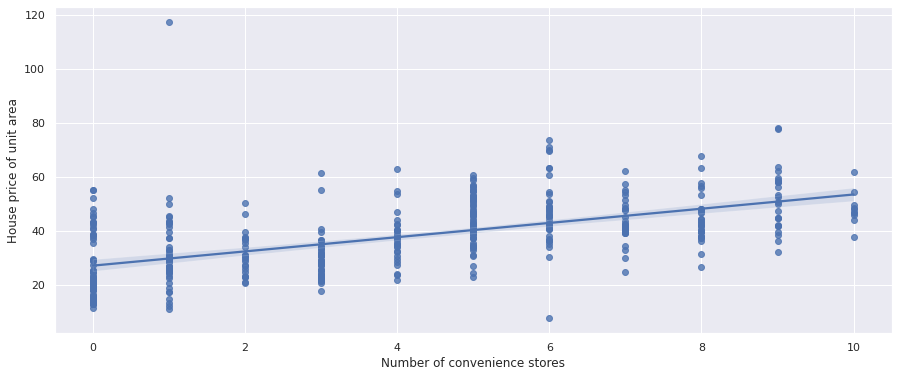

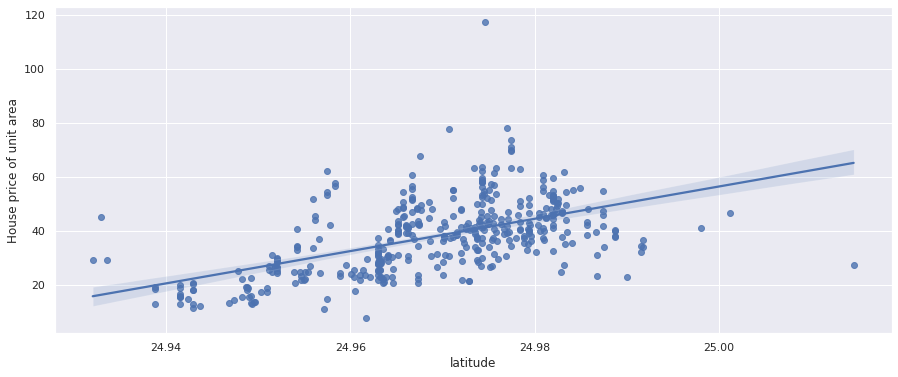

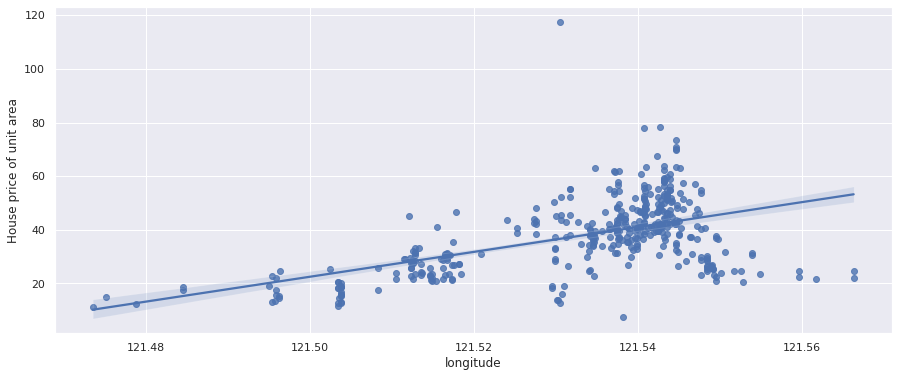

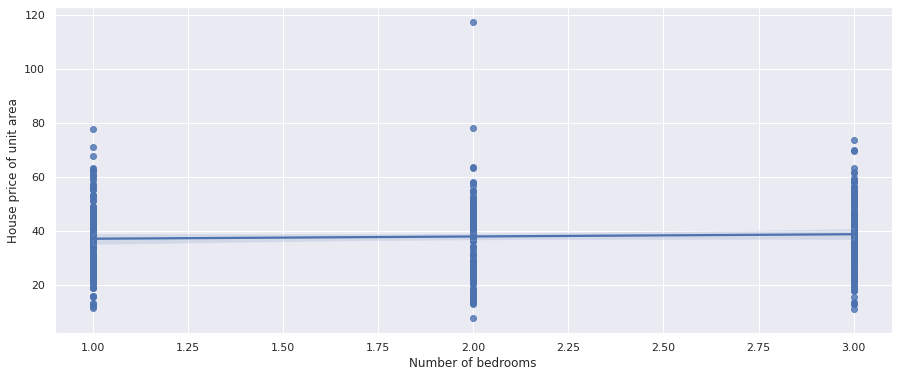

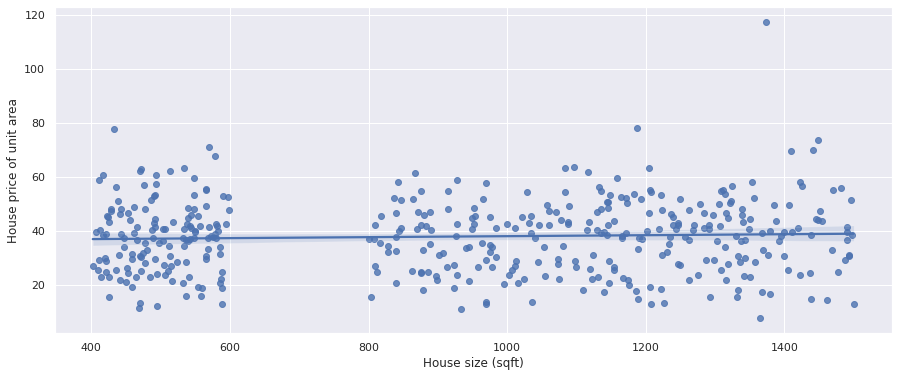

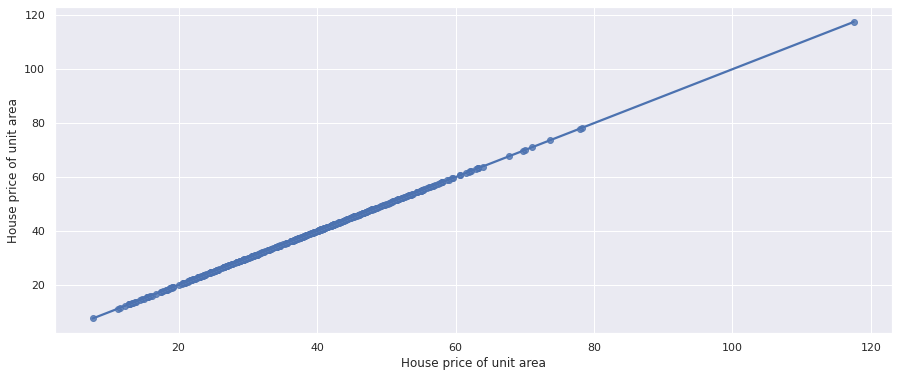

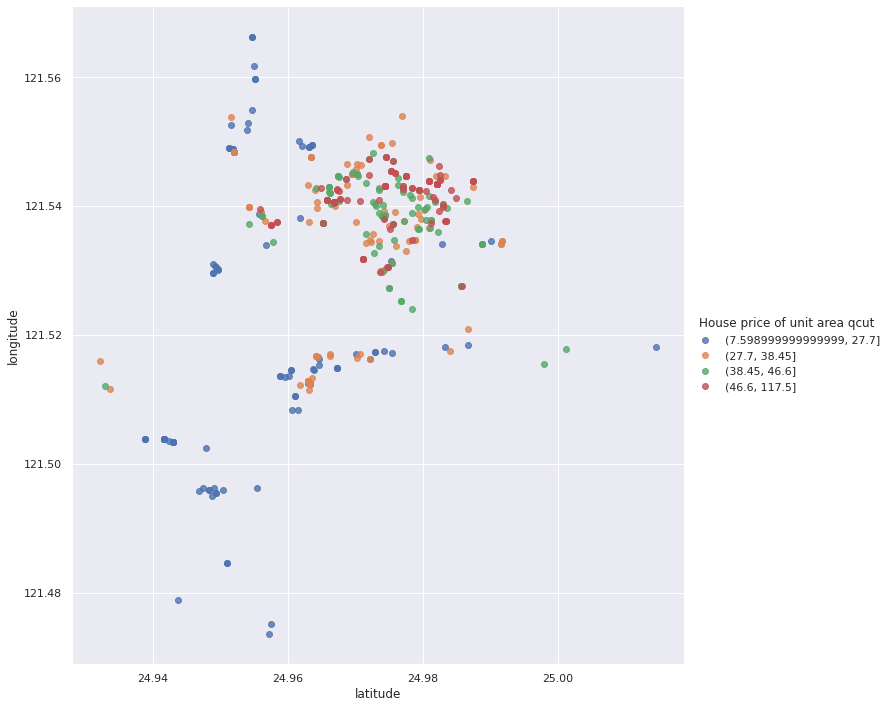

In [ ]:
colunas = data.columns[:-1]
for col in colunas:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.regplot(x=col,y='House price of unit area',data=data)
sns.lmplot( x='latitude', y='longitude', data=data, fit_reg=False, hue='House price of unit area qcut', legend=True, height=10,aspect=1)

In [ ]:
data.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [ ]:
#Calculating the house price which is our target variable
data['House_Price']=data['House price of unit area']*data['House size (sqft)']

In [ ]:
#selecting the variables for prediction
X=data[["House Age","Distance from nearest Metro station (km)","Number of convenience stores","latitude","longitude","Number of bedrooms"]]

In [ ]:
Y=data[["House_Price"]]

In [ ]:
#converting variables to dummies
X=pd.get_dummies(X, columns=['Number of convenience stores', 'Number of bedrooms'])

In [ ]:
X.head()

,House Age,Distance from nearest Metro station (km),latitude,longitude,Number of convenience stores_0,Number of convenience stores_1,Number of convenience stores_2,Number of convenience stores_3,Number of convenience stores_4,Number of convenience stores_5,Number of convenience stores_6,Number of convenience stores_7,Number of convenience stores_8,Number of convenience stores_9,Number of convenience stores_10,Number of bedrooms_1,Number of bedrooms_2,Number of bedrooms_3
0,32.0,84.87882,24.98298,121.54024,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,19.5,306.59470,24.98034,121.53951,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,13.3,561.98450,24.98746,121.54391,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,13.3,561.98450,24.98746,121.54391,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,5.0,390.56840,24.97937,121.54245,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
len(data)

414

In [ ]:
len(data.loc[data['Distance from nearest Metro station (km)']>=5000])

5

In [ ]:
fig = px.histogram(data, x='Distance from nearest Metro station (km)')

fig.show()

In [ ]:
#Dropping the outliers, considering that distance greater than 5000 from metro station is an outlier for our predictions
data.drop(data[data['Distance from nearest Metro station (km)'] >= 5000].index, inplace = True)

In [ ]:
len(data)

409

LINEAR REGRESSION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=13
)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions=lm.predict(X_test)

In [ ]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lm.score(X_test, y_test)))

Variance score: 0.646921190484306


In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
mape(y_test, predictions)

27.728993528637442

MAPE for linear regression model is 27.7% which means that there is 27% difference between the actual and predicted values.

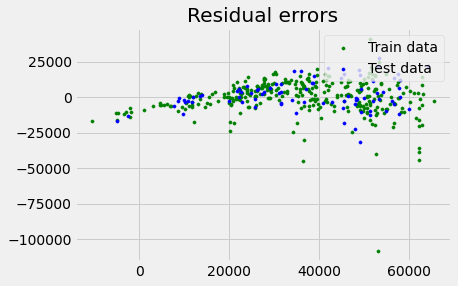

In [ ]:
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

RANDOM FOREST REGRESSION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=13
)

params = {
    "n_estimators": 50,
    "max_depth": 4,
    "min_samples_split": 5
}

In [ ]:
feature_names=list(X_train.columns)

In [ ]:
feature_names

['House Age',
 'Distance from nearest Metro station (km)',
 'latitude',
 'longitude',
 'Number of convenience stores_0',
 'Number of convenience stores_1',
 'Number of convenience stores_2',
 'Number of convenience stores_3',
 'Number of convenience stores_4',
 'Number of convenience stores_5',
 'Number of convenience stores_6',
 'Number of convenience stores_7',
 'Number of convenience stores_8',
 'Number of convenience stores_9',
 'Number of convenience stores_10',
 'Number of bedrooms_1',
 'Number of bedrooms_2',
 'Number of bedrooms_3']

In [ ]:
reg = ensemble.RandomForestRegressor(**params)
reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=50)

In [ ]:
pred=reg.predict(X_test)

In [ ]:
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.7022700951680408


In [ ]:
mape(y_test, pred)

78.2172762281095

Let's try to improve the model and do Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = ensemble.RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
p1=grid_search.best_params_

In [ ]:
clf1=ensemble.RandomForestRegressor(random_state=1)
clf1.set_params(**grid_search.best_params_)
clf1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=300, random_state=1)

In [ ]:
print('Variance score: {}'.format(clf1.score(X_test, y_test)))

Variance score: 0.7081397805437236


In [ ]:
pred1=reg.predict(X_test)

In [ ]:
mape(y_test, pred1)

78.2172762281095

In [ ]:
# feature importance
print(reg.feature_importances_)

[6.99198889e-02 3.51231183e-01 6.22292615e-02 6.06805729e-02
 3.83973451e-04 9.51566444e-03 5.00821799e-04 1.47909051e-03
 2.33669565e-04 2.36462168e-04 2.06381859e-03 0.00000000e+00
 1.18513199e-04 3.10764467e-03 0.00000000e+00 4.37101021e-01
 0.00000000e+00 1.19841394e-03]


In [ ]:
feature_imp = pd.Series(reg.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

Number of bedrooms_1                        0.437520
Distance from nearest Metro station (km)    0.380345
House Age                                   0.076420
latitude                                    0.047550
longitude                                   0.046077
Number of convenience stores_1              0.003721
Number of convenience stores_9              0.002998
Number of convenience stores_3              0.002989
Number of convenience stores_2              0.000769
Number of bedrooms_3                        0.000587
Number of convenience stores_5              0.000538
Number of convenience stores_4              0.000290
Number of convenience stores_8              0.000081
Number of convenience stores_0              0.000056
Number of convenience stores_7              0.000034
Number of bedrooms_2                        0.000025
Number of convenience stores_6              0.000000
Number of convenience stores_10             0.000000
dtype: float64

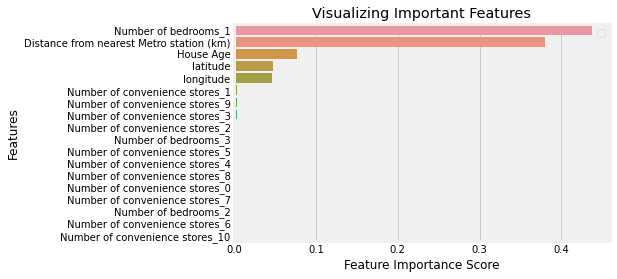

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
Y_pred = model_SVR.predict(X_test)
 
print(mean_absolute_percentage_error(y_test, Y_pred))

0.5254952182433159


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
mape(y_test,Y_pred)

52.61042864144632

GRADIENT BOOSTING REGRESSOR

In [ ]:
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr = ensemble.GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train, y_train)
#

Y_pred2 = gbr.predict(X_test)
# Print Coefficient of determination R^2
#

mape(y_test,Y_pred2)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



76.77283885962126